In [1]:
library(tidyverse)
library(ggplot2)
library(ggridges)

── Attaching core tidyverse packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Figure 2B

In [2]:
df <- readr::read_tsv("outputs/genes_overlap.tsv")

expts_sel <- c('llm_genes_role', 'llm_genes_reason', 'llm_genes_conf_high', 'llm_ensembled')
df <- df %>% filter(gene_set %in% expts_sel)

# Step 1: Update model names
df <- df %>%
  mutate(model = case_when(
    model == "gpt-4o-mini-2024-07-18" ~ "GPT-4o mini",
    model == "gpt-3.5-turbo-0125" ~ "GPT-3.5",
    model == "gpt-4o-2024-08-06" ~ "GPT-4o",
    TRUE ~ model  # Leave other values unchanged
  ))

# Step 2: Update database names
df <- df %>%
  mutate(database = case_when(
    database == "KEGG_2021_Human" ~ "KEGG",
    database == "Reactome_2022" ~ "Reactome",
    database == "WikiPathway_2023_Human" ~ "WikiPathways",
    database == "GO_Biological_Process_2023_sample1000" ~ "GOBP(1000)",
    TRUE ~ database  # Leave other values unchanged
  ))

# Step 3: Set the order of the 'model' factor
df <- df %>%
  mutate(model = factor(model, levels = c("GPT-3.5", "GPT-4o mini", "GPT-4o")))


Rows: 82719 Columns: 17
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (5): database, model, gene_set, descr, descr_cleaned
dbl (12): ncurated, nllm, ninter, generatio, bgratio, richFactor, foldEnrich...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
df <- df %>%
  mutate(gene_set = case_when(
    gene_set == "llm_genes_role" ~ "Default",
    gene_set == "llm_genes_reason" ~ "Reasoning",
    gene_set == "llm_genes_conf_high" ~ "Confidence",
    gene_set == "llm_ensembled" ~ "Ensembled",
    TRUE ~ gene_set  # Keep other values unchanged
  ))

df <- df %>%
  mutate(gene_set = factor(gene_set, levels = c("Default", "Reasoning", "Confidence", "Ensembled")))


`summarise()` has grouped output by 'database', 'model'. You can override using the `.groups` argument.


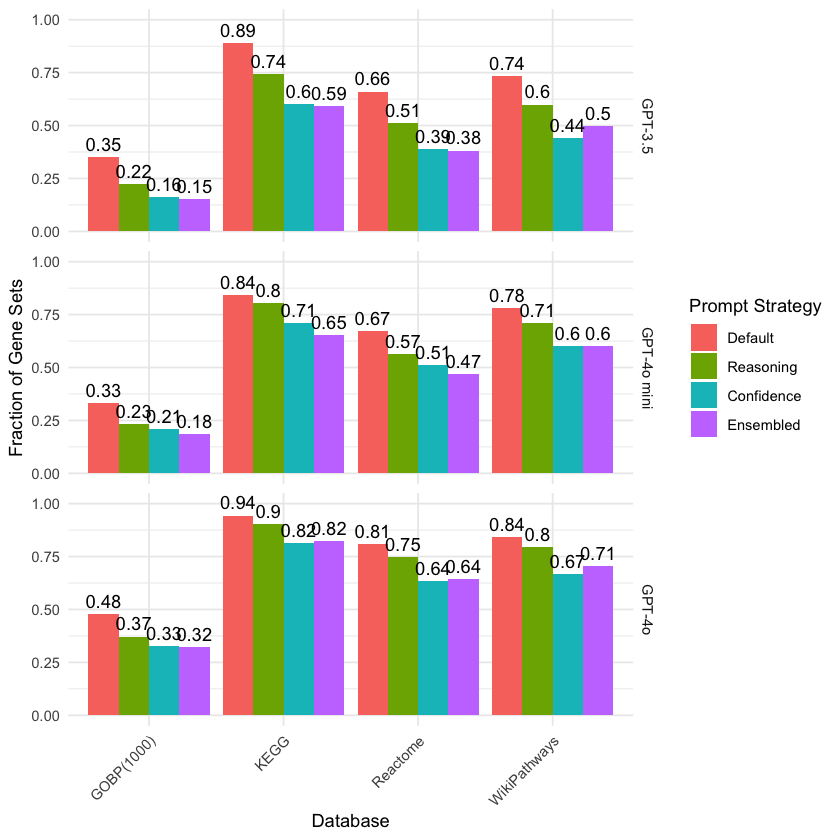

In [4]:
# Step 1: Group by 'database', 'model', and 'gene_set', and calculate the fraction of rows where p_val_adj < 0.01
df_fraction <- df %>%
  group_by(database, model, gene_set) %>%
  summarize(fraction_p_val_adj_lt_001 = mean(p_val_adj < 0.01, na.rm = TRUE)) %>%
  ungroup()

# Step 2: Create a bar plot grouped by 'database' and filled by 'gene_set', faceted by 'model' across rows
p <- ggplot(df_fraction, aes(x = database, y = fraction_p_val_adj_lt_001, fill = gene_set)) +
  geom_bar(stat = "identity", position = "dodge") +  # Create a grouped bar plot
  geom_text(aes(label = round(fraction_p_val_adj_lt_001, 2)),   # Add the fraction values rounded to 2 decimal places
            position = position_dodge(width = 0.9), vjust = -0.5) +  # Adjust the label position
  facet_grid(model ~ .) +  # Facet the plot by 'model' across rows
  scale_y_continuous(limits = c(0, 1)) +  # Set the y-axis to range from 0 to 1
  labs(x = "Database", y = "Fraction of Gene Sets", fill = "Prompt Strategy") +  # Update axis and legend labels
  theme_minimal() +  # Use a minimal theme
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) 
p

In [5]:
ggsave(p, file="figures/fig2B.pdf", width=9, height=9)

# Figure 2C

In [6]:
df <- readr::read_tsv("outputs/genes_overlap.tsv")
table(df$gene_set)

Rows: 82719 Columns: 17
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (5): database, model, gene_set, descr, descr_cleaned
dbl (12): ncurated, nllm, ninter, generatio, bgratio, richFactor, foldEnrich...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



        llm_ensembled   llm_genes_conf_high    llm_genes_conf_low 
                11817                 11817                 11817 
llm_genes_conf_medium      llm_genes_norole      llm_genes_reason 
                11817                 11817                 11817 
       llm_genes_role 
                11817 

In [7]:
df <- readr::read_tsv("outputs/genes_overlap.tsv")

expts_sel <- c('llm_genes_role', 'llm_genes_reason', 'llm_genes_conf_high', 'llm_ensembled')
df <- df %>% filter(gene_set %in% expts_sel)

# Step 1: Update model names
df <- df %>%
  mutate(model = case_when(
    model == "gpt-4o-mini-2024-07-18" ~ "GPT-4o mini",
    model == "gpt-3.5-turbo-0125" ~ "GPT-3.5",
    model == "gpt-4o-2024-08-06" ~ "GPT-4o",
    TRUE ~ model  # Leave other values unchanged
  ))

# Step 2: Update database names
df <- df %>%
  mutate(database = case_when(
    database == "KEGG_2021_Human" ~ "KEGG",
    database == "Reactome_2022" ~ "Reactome",
    database == "WikiPathway_2023_Human" ~ "WikiPathways",
    TRUE ~ database  # Leave other values unchanged
  ))

# Step 3: Set the order of the 'model' factor
df <- df %>%
  mutate(model = factor(model, levels = c("GPT-3.5", "GPT-4o mini", "GPT-4o")))
df <- df %>%
  mutate(gene_set = case_when(
    gene_set == "llm_genes_role" ~ "Default",
    gene_set == "llm_genes_reason" ~ "Reasoning",
    gene_set == "llm_genes_conf_high" ~ "Confidence (high)",
    gene_set == "llm_ensembled" ~ "Ensembled",
    TRUE ~ gene_set  # Keep other values unchanged
  ))

df <- df %>%
  mutate(gene_set = factor(gene_set, levels = c("Default", "Reasoning", "Confidence (high)", "Ensembled")))


Rows: 82719 Columns: 17
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (5): database, model, gene_set, descr, descr_cleaned
dbl (12): ncurated, nllm, ninter, generatio, bgratio, richFactor, foldEnrich...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Warning message in geom_density_ridges(scale = 0.95, alpha = 0.7, color = "black", :
“Ignoring unknown parameters: `size`”
Warning message:
“Removed 1704 rows containing non-finite outside the scale range (`stat_binline()`).”
Picking joint bandwidth of 0.0635

Picking joint bandwidth of 0.0504

Picking joint bandwidth of 0.0542

Warning message:
“Removed 1704 rows containing non-finite outside the scale range (`stat_density_ridges()`).”


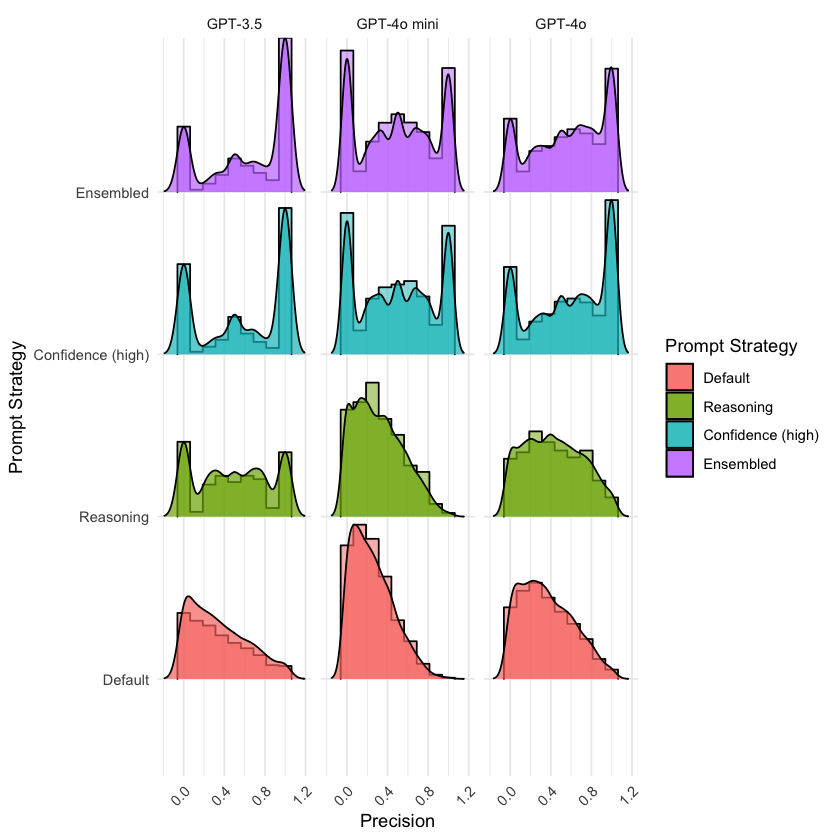

In [8]:

# Create a ridge plot with bins and smooth densities, faceted by 'model'
p <- ggplot(df, aes(x = richFactor, y = gene_set, fill = gene_set)) +
  geom_density_ridges(stat = "binline", bins = 9, scale = 0.95, draw_baseline = FALSE, alpha = 0.5) +  # Binned density ridges
  geom_density_ridges(scale = 0.95, alpha = 0.7, color = "black", size = 0.3) +  # Smooth density ridges
  facet_wrap(~ model) +  # Facet the plot by 'model'
  labs(x = "Precision", y = "Prompt Strategy", fill = "Prompt Strategy") +  # Set axis and legend labels
  theme_minimal() +  # Use a minimal theme
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate x-axis labels for readability
p

In [9]:
ggsave(p, file="figures/fig2C.pdf", width=7,height=5)

Warning message:
“Removed 1704 rows containing non-finite outside the scale range (`stat_binline()`).”
Picking joint bandwidth of 0.0635

Picking joint bandwidth of 0.0504

Picking joint bandwidth of 0.0542

Warning message:
“Removed 1704 rows containing non-finite outside the scale range (`stat_density_ridges()`).”


## Figure S2A

In [10]:
df <- readr::read_tsv("outputs/genes_overlap.tsv")

expts_sel <- c('llm_genes_conf_high','llm_genes_conf_medium', 'llm_genes_conf_low')
df <- df %>% filter(gene_set %in% expts_sel)


# Step 1: Update model names
df <- df %>%
  mutate(model = case_when(
    model == "gpt-4o-mini-2024-07-18" ~ "GPT-4o mini",
    model == "gpt-3.5-turbo-0125" ~ "GPT-3.5",
    model == "gpt-4o-2024-08-06" ~ "GPT-4o",
    TRUE ~ model  # Leave other values unchanged
  ))

# Step 2: Update database names
df <- df %>%
  mutate(database = case_when(
    database == "KEGG_2021_Human" ~ "KEGG",
    database == "Reactome_2022" ~ "Reactome",
    database == "WikiPathway_2023_Human" ~ "WikiPathways",
    database == "GO_Biological_Process_2023_sample1000" ~ "GOBP(1000)",
    TRUE ~ database  # Leave other values unchanged
  ))

# Step 3: Set the order of the 'model' factor
df <- df %>%
  mutate(model = factor(model, levels = c("GPT-3.5", "GPT-4o mini", "GPT-4o")))
df <- df %>%
  mutate(gene_set = case_when(
    gene_set == "llm_genes_conf_high" ~ "Confidence (high)",
    gene_set == "llm_genes_conf_medium" ~ "Confidence (medium)",
    gene_set == "llm_genes_conf_low" ~ "Confidence (low)",
    TRUE ~ gene_set  # Keep other values unchanged
  ))

df <- df %>%
  mutate(gene_set = factor(gene_set, levels = c("Confidence (high)", "Confidence (medium)", "Confidence (low)")))


Rows: 82719 Columns: 17
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (5): database, model, gene_set, descr, descr_cleaned
dbl (12): ncurated, nllm, ninter, generatio, bgratio, richFactor, foldEnrich...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Warning message in geom_density_ridges(scale = 0.95, alpha = 0.7, color = "black", :
“Ignoring unknown parameters: `size`”
Warning message:
“Removed 3802 rows containing non-finite outside the scale range (`stat_binline()`).”
Picking joint bandwidth of 0.0718

Picking joint bandwidth of 0.0473

Picking joint bandwidth of 0.0473

Warning message:
“Removed 3802 rows containing non-finite outside the scale range (`stat_density_ridges()`).”
Warning message:
“Removed 3802 rows containing non-finite outside the scale range (`stat_binline()`).”
Picking joint bandwidth of 0.0718

Picking joint bandwidth of 0.0473

Picking joint bandwidth of 0.0473

Warning message:
“Removed 3802 rows containing non-finite outside the scale range (`stat_density_ridges()`).”


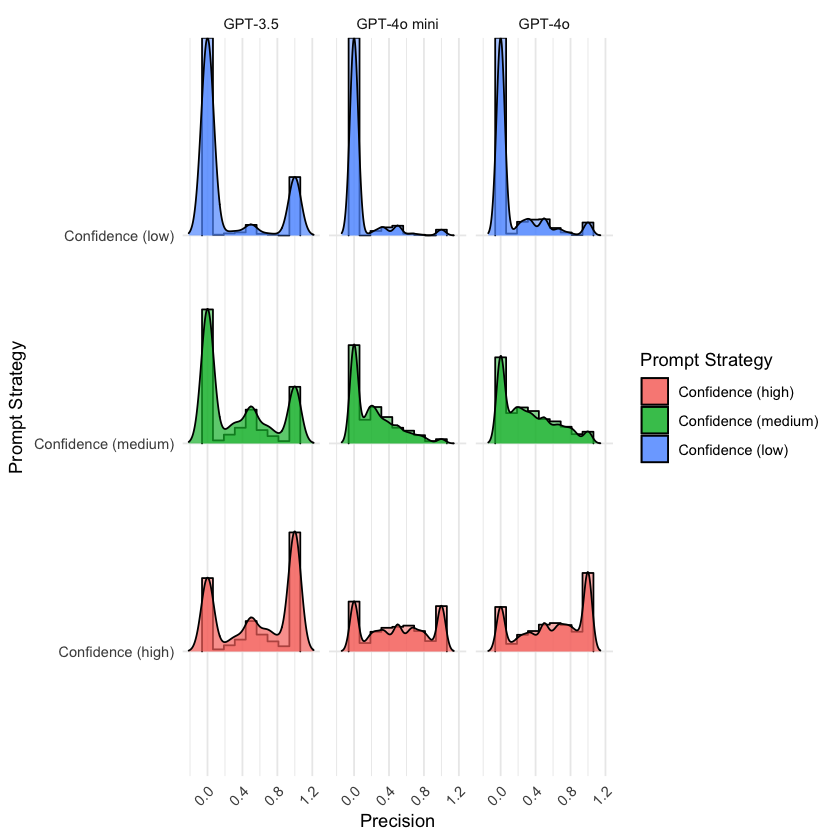

In [11]:

# Create a ridge plot with bins and smooth densities, faceted by 'model'
p <- ggplot(df, aes(x = richFactor, y = gene_set, fill = gene_set)) +
  geom_density_ridges(stat = "binline", bins = 9, scale = 0.95, draw_baseline = FALSE, alpha = 0.5) +  # Binned density ridges
  geom_density_ridges(scale = 0.95, alpha = 0.7, color = "black", size = 0.3) +  # Smooth density ridges
  facet_wrap(~ model) +  # Facet the plot by 'model'
  labs(x = "Precision", y = "Prompt Strategy", fill = "Prompt Strategy") +  # Set axis and legend labels
  theme_minimal() +  # Use a minimal theme
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate x-axis labels for readability

ggsave(p, file="figures/figS2A.pdf", width=7,height=5) 
print(p)

## Figure S2B

In [32]:
# Get gene set p-values
df0 <- readr::read_tsv("outputs/genes_overlap.tsv")
df0 <- df0 %>% select(c("model", "database", "descr", "gene_set", "p_val_adj"))
df0.ensembled <- df0 %>% filter(gene_set == "llm_ensembled")
df0.high <- df0 %>% filter(gene_set == "llm_genes_conf_high")


df <- readr::read_tsv("outputs/overlap_high_vs_ensemble.tsv")
test <- merge(df, df0.ensembled, by=c("model", "database", "descr"))
test <- merge(test, df0.high, by=c("model", "database", "descr"))

colnames(test)
dim(test)
test_sig <- test %>% filter(p_val_adj.x < 0.01 & p_val_adj.y < 0.01)


# Step 1: Update model names
test_sig <- test_sig %>%
  mutate(model = case_when(
    model == "gpt-4o-mini-2024-07-18" ~ "GPT-4o mini",
    model == "gpt-3.5-turbo-0125" ~ "GPT-3.5",
    model == "gpt-4o-2024-08-06" ~ "GPT-4o",
    TRUE ~ model  # Leave other values unchanged
  ))

# Step 2: Update database names
test_sig <- test_sig %>%
  mutate(database = case_when(
    database == "KEGG_2021_Human" ~ "KEGG",
    database == "Reactome_2022" ~ "Reactome",
    database == "WikiPathway_2023_Human" ~ "WikiPathways",
    database == "GO_Biological_Process_2023_sample1000" ~ "GOBP(1000)",
    TRUE ~ database  # Leave other values unchanged
  ))

Rows: 82719 Columns: 17
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (5): database, model, gene_set, descr, descr_cleaned
dbl (12): ncurated, nllm, ninter, generatio, bgratio, richFactor, foldEnrich...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 11817 Columns: 7
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (4): database, model, descr, descr_cleaned
dbl (3): ninter, nunion, jaccard_similarity

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "model"              "database"           "descr"             
 [4] "descr_cleaned"      "ninter"             "nunion"            
 [7] "jaccard_similarity" "gene_set.x"         "p_val_adj.x"       
[10] "gene_set.y"         "p_val_adj.y"

[1] 11817    11

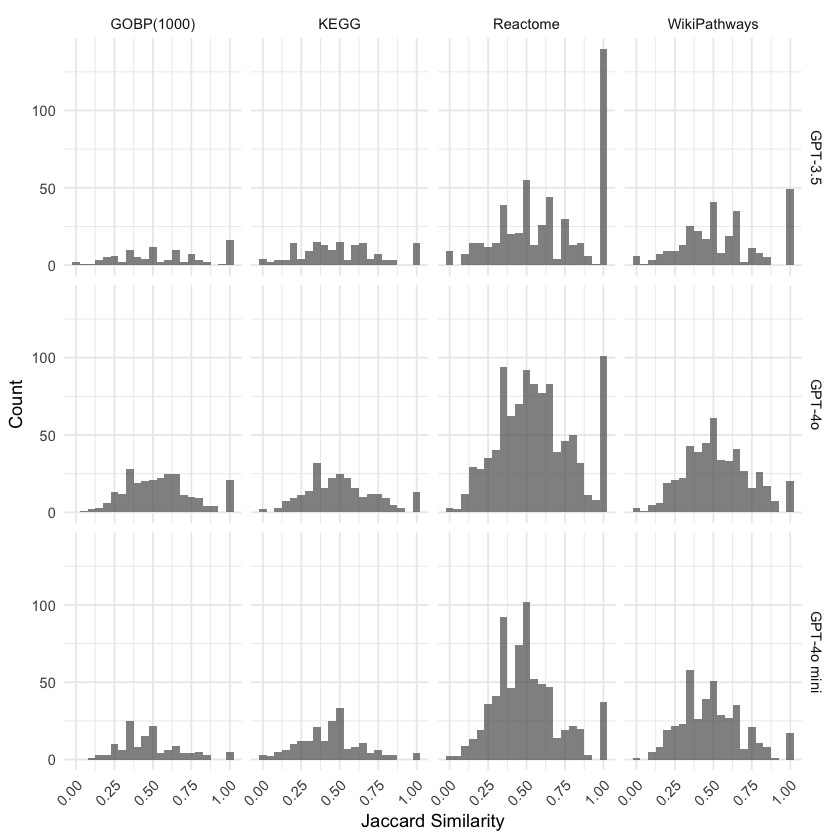

In [33]:

# Create a histogram of 'jaccard_similarity' faceted by 'model' and 'database'
p <- ggplot(test_sig, aes(x = jaccard_similarity)) +
    geom_histogram(binwidth = 0.05, alpha = 0.7, position = "identity") +  # Create a histogram with specified bin width
    facet_grid(model ~ database) +  # Facet the plot by 'model' and 'database'
    labs(x = "Jaccard Similarity", y = "Count", fill = "Gene Set") +  # Set axis and legend labels
    theme_minimal() +  # Use a minimal theme
    theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate x-axis labels for readability
p

In [34]:
ggsave(p, file="figures/figS2B.pdf", width=7,height=5) 

## Figure S2C-S2D

In [12]:
df <- readr::read_tsv("outputs/tok_use.tsv")
expts_sel <- c('llm_genes_role', 'llm_genes_reason', 'llm_genes_conf_high', 'llm_ensembled')
df <- df %>% filter(gene_set %in% expts_sel)
# Step 1: Update model names
df <- df %>%
  mutate(model = case_when(
    model == "gpt-4o-mini-2024-07-18" ~ "GPT-4o mini",
    model == "gpt-3.5-turbo-0125" ~ "GPT-3.5",
    model == "gpt-4o-2024-08-06" ~ "GPT-4o",
    TRUE ~ model  # Leave other values unchanged
  ))
# Step 2: Update database names
df <- df %>%
  mutate(lib_name = case_when(
    lib_name == "KEGG_2021_Human" ~ "KEGG",
    lib_name == "Reactome_2022" ~ "Reactome",
    lib_name == "WikiPathway_2023_Human" ~ "WikiPathways",
    lib_name == "GO_Biological_Process_2023_sample1000" ~ "GOBP(1000)",
    TRUE ~ lib_name  # Leave other values unchanged
  ))

df <- df %>%
  mutate(gene_set = case_when(
    gene_set == "llm_genes_role" ~ "Default",
    gene_set == "llm_genes_reason" ~ "Reasoning",
    gene_set == "llm_genes_conf_high" ~ "Confidence",
    gene_set == "llm_ensembled" ~ "Ensembled",
    TRUE ~ gene_set  # Keep other values unchanged
  ))

# Step 3: Set the order of the 'model' factor
df <- df %>%
  mutate(model = factor(model, levels = c("GPT-3.5", "GPT-4o mini", "GPT-4o")))

df <- df %>%
  mutate(gene_set = factor(gene_set, levels = c("Default", "Reasoning", "Confidence", "Ensembled")))

head(df)

Rows: 84 Columns: 5
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): lib_name, model, gene_set
dbl (2): in_toks, out_toks

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


lib_name,model,gene_set,in_toks,out_toks
<chr>,<fct>,<fct>,<dbl>,<dbl>
KEGG,GPT-4o mini,Default,55292,80365
KEGG,GPT-4o mini,Reasoning,67772,149116
KEGG,GPT-4o mini,Confidence,72892,89773
KEGG,GPT-4o mini,Ensembled,254060,387641
KEGG,GPT-3.5,Default,54840,84445
KEGG,GPT-3.5,Reasoning,67640,65903


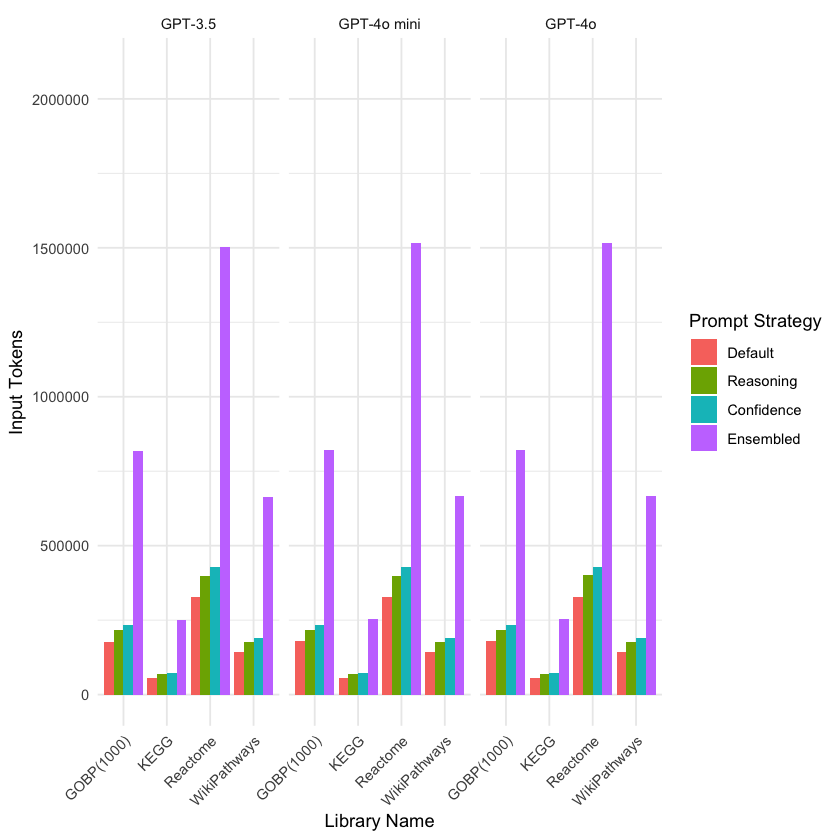

In [13]:
# Create a bar plot of 'in_toks' grouped by 'lib_name' and filled by 'gene_set', faceted by 'model'
p <- ggplot(df, aes(x = lib_name, y = in_toks, fill = gene_set)) +
  geom_bar(stat = "identity", position = "dodge") +  # Create a grouped bar plot with side-by-side bars
  facet_wrap(~ model) +  # Facet the plot by 'model'
  labs(x = "Library Name", y = "Input Tokens", fill = "Prompt Strategy") +  # Set axis and legend labels
  theme_minimal() +  # Use a minimal theme
  ylim(c(0,2.1e6)) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate x-axis labels for readability
p

In [14]:
ggsave(p, file="figures/figS2C.pdf", width=8,height=4)

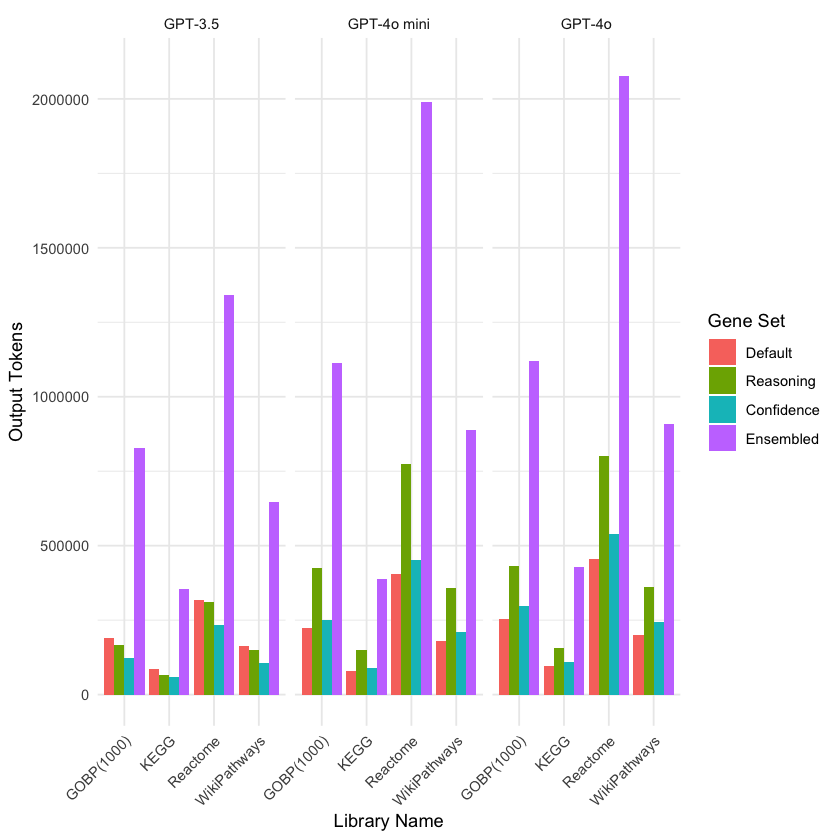

In [15]:
# Create a bar plot of 'in_toks' grouped by 'lib_name' and filled by 'gene_set', faceted by 'model'
p <- ggplot(df, aes(x = lib_name, y = out_toks, fill = gene_set)) +
  geom_bar(stat = "identity", position = "dodge") +  # Create a grouped bar plot with side-by-side bars
  facet_wrap(~ model) +  # Facet the plot by 'model'
  labs(x = "Library Name", y = "Output Tokens", fill = "Gene Set") +  # Set axis and legend labels
  theme_minimal() +  # Use a minimal theme
  ylim(c(0,2.1e6)) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate x-axis labels for readability
p

In [16]:
ggsave(p, file="figures/figS2D.pdf", width=8,height=4)